In [66]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(0) 

# Load the 'automobile.txt' file and create a dataframe for it
# Use a comma as the delimiter to seperate the values into columns
df = pd.read_table('automobile.txt', delimiter=",")

# Display the first 10 rows to get a better understanding of what the dataset entails
df.head(10)

# From scanning the first 10 rows of the dataset, we can already see that the second column
# has quite a few missing values. We will address this later 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [67]:
# Use the 'columns' function to view all the column headers
# This will help us identify which columns are relevant for 
# further analysis

# Note: 'symboling' - Safety of the vehicle as it relates to the vehicles price. 
#                     Values for this classification are inversely proportional.
#       'normalized losses' - relative average loss payment per insured vehicle
#                             year. Value is normalized within a particular size classification.

df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [68]:
# We can use the dataset to gain insights to how different features of the
# car relate to the price of the car. 
# All steps taken from this point forward would be maximise the efficiency 
# of the dataset to calculate prices 



In [69]:
# Check the data types of the values 
# This will help us identify which values 
# to convert datatypes 
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [70]:
# start the cleansing process by finding any null values in the dataset

df.isnull().sum()

# The dataset contains no null values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [71]:
# Irregularities occur in the dataset where "?" appears in the normalized-losses column
# find the number of "?" values in the normalized-losses columns

df['normalized-losses'].loc[df['normalized-losses'] == '?'].count()

41

In [72]:
# address the missing values by setting the missing value to mean of normalized 
# losses and 
# convert the datatype of values to int

nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nlmean).astype(int)
df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [73]:
# identify the number of values which are not numeric(missing) in the 'price' columns
# and find the position of those values
df['price'].str.isnumeric().value_counts()

df['price'].loc[df['price'].str.isnumeric() == False]

# Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [74]:
# Checking the numberic and replacing with mean value and convert the datatype to integer
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',pmean).astype(int)

# Find any outliers in the horsepower column that might impact(skew) the data
df.loc[df['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9895


In [75]:
#Excluding the outlier data for horsepower
df[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [76]:
# Find out the number of invalid value
df['bore'].loc[df['bore'] == '?']

# Replace the non-numeric value to null and convert the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [77]:
# Replace the non-number value to null and convert the datatype
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df.dtypes



symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [78]:
# Convert the non-numeric data to null and convert the datatype
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [79]:
# remove the records which are having the value '?'
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df = df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

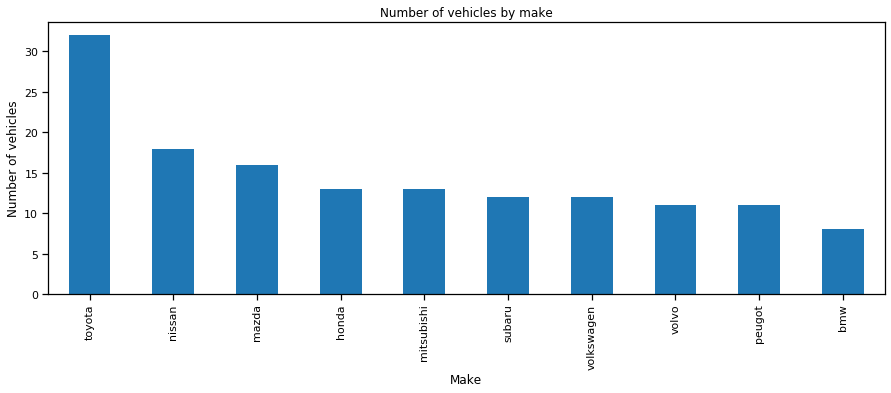

In [85]:
# import the necessary modules for visual analysis

import matplotlib.pyplot as plt
%matplotlib inline

df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

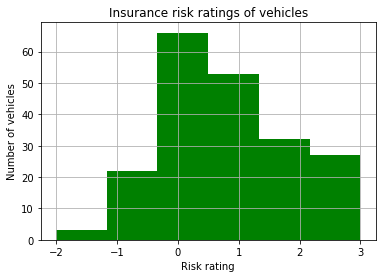

In [33]:
# Insurance risk ratings histogram

df.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

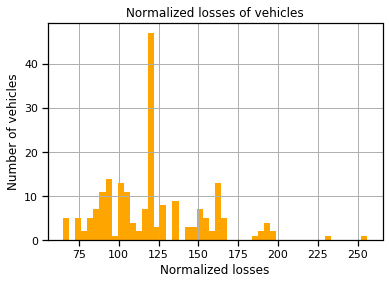

In [93]:
# normalized losses histogram
df['normalized-losses'].hist(bins=50,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses'); 

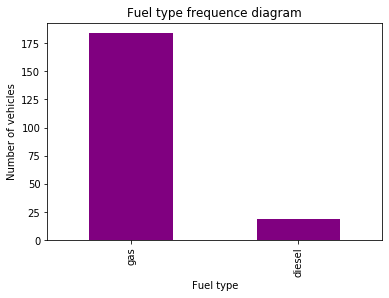

In [36]:
# fuel type bar chart
df['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

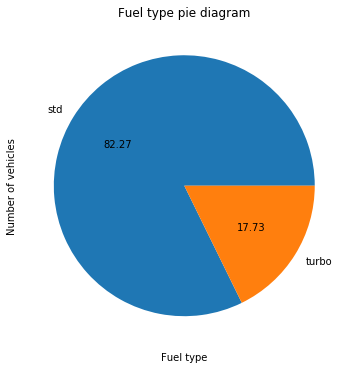

In [37]:
#fuel type bar graph
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

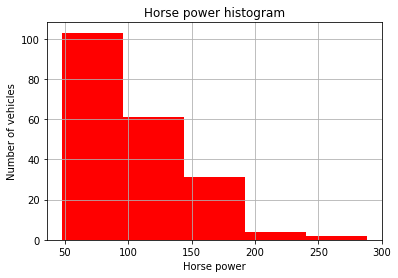

In [38]:
df.horsepower[np.abs(df.horsepower-df.horsepower.mean())<=(3*df.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

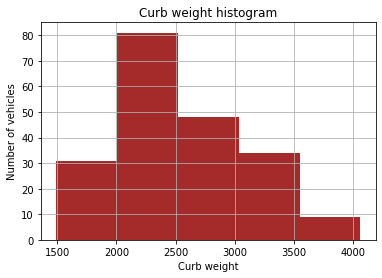

In [41]:
df['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

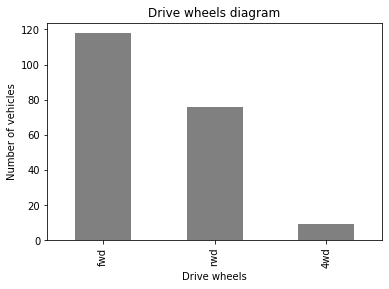

In [42]:
df['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

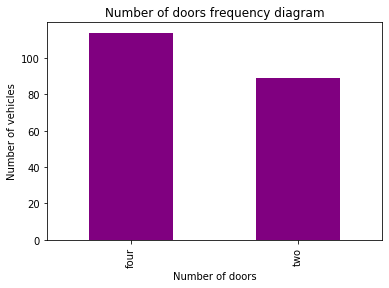

In [43]:
df['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

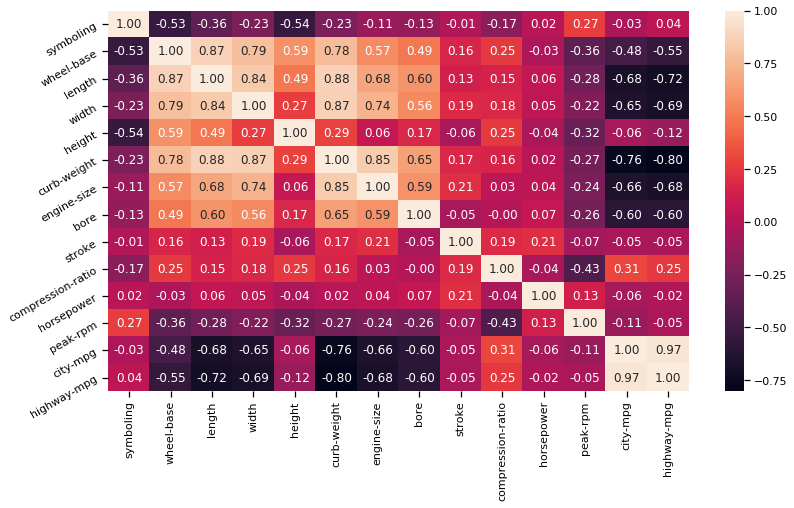

In [44]:
import seaborn as sns

corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

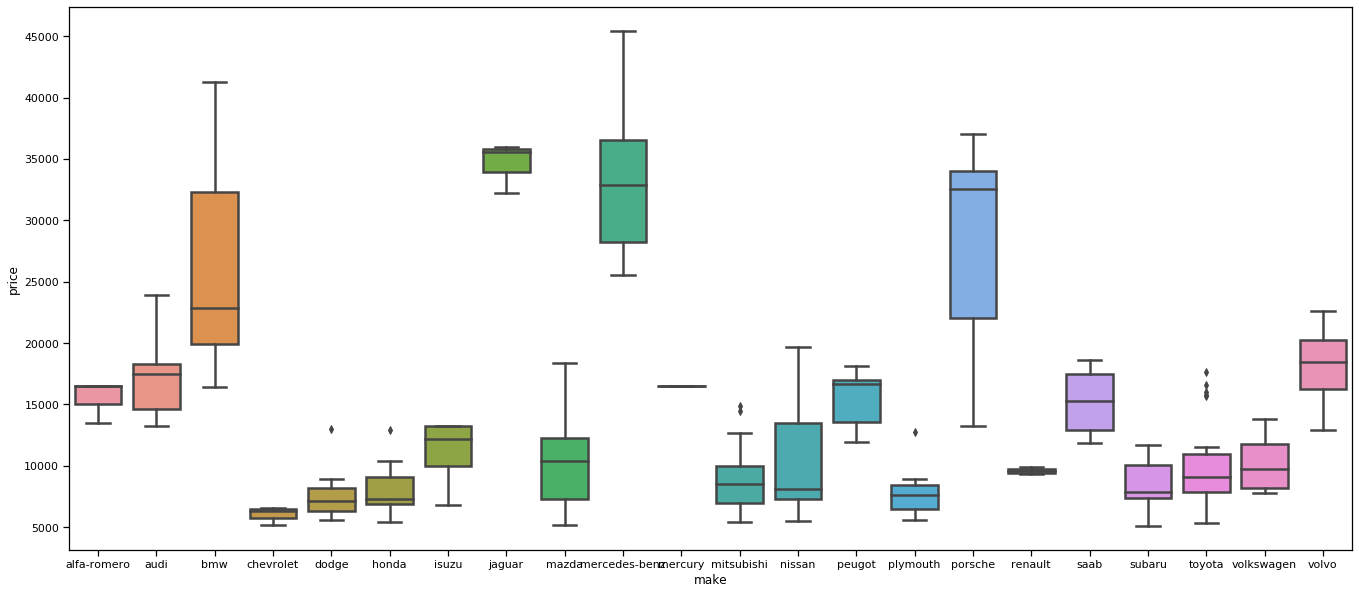

In [47]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data= df)

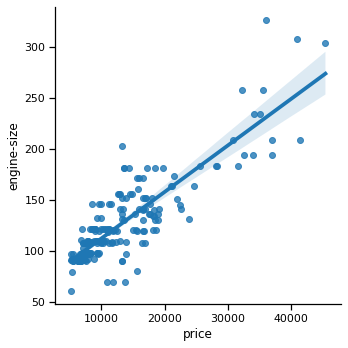

In [48]:
g = sns.lmplot('price',"engine-size", df);


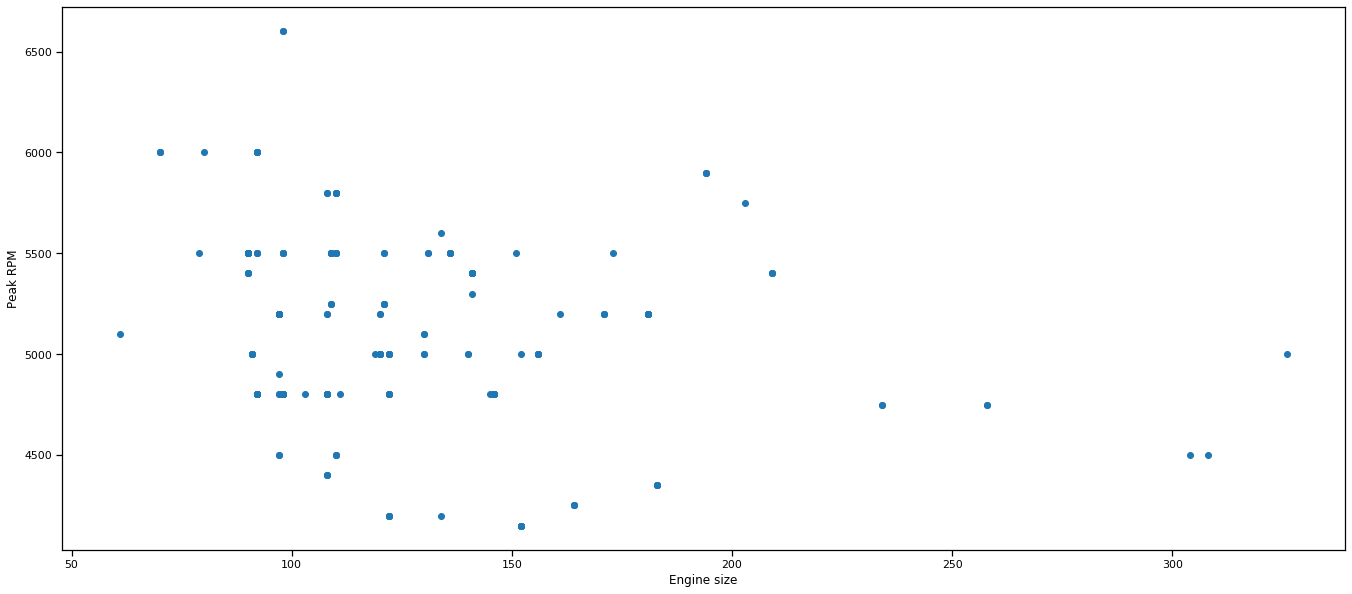

In [51]:
plt.scatter(df['engine-size'],df['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

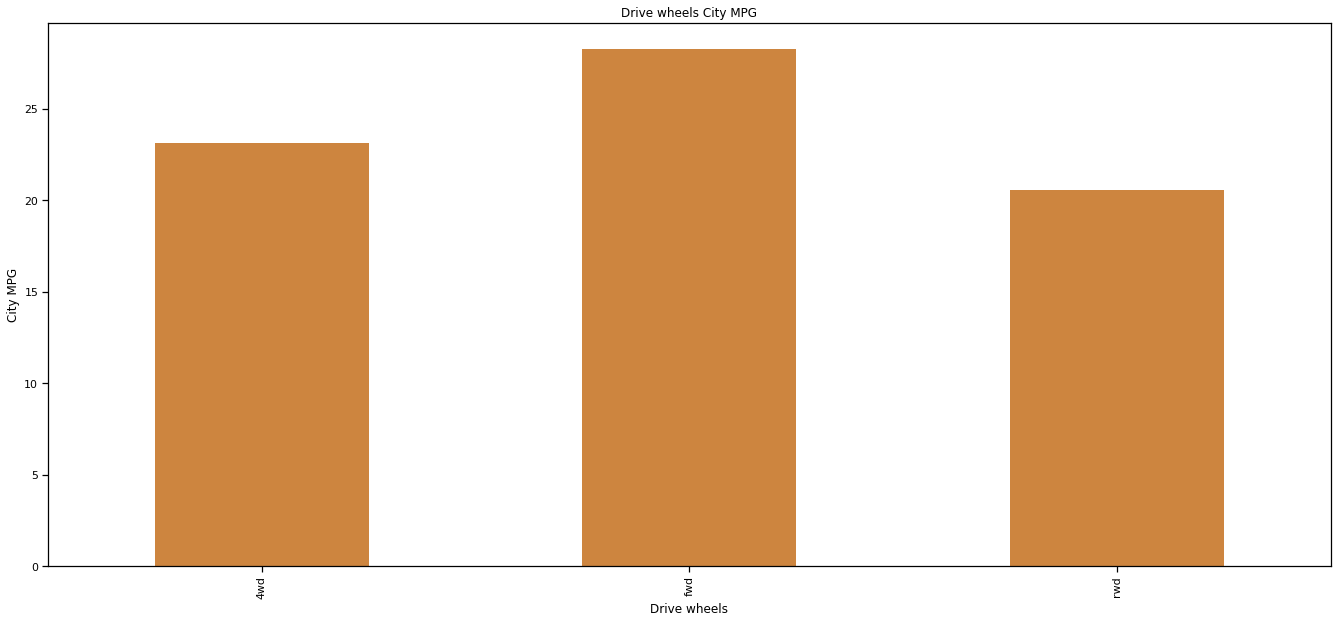

In [57]:
df.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

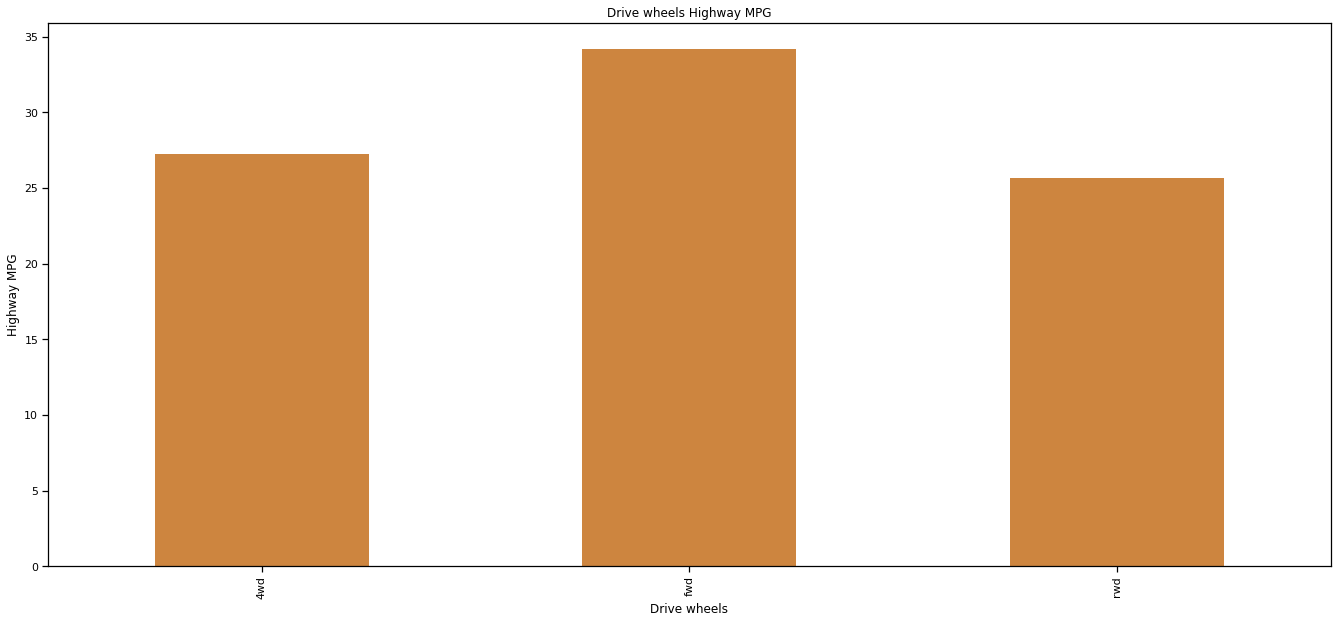

In [58]:
df.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

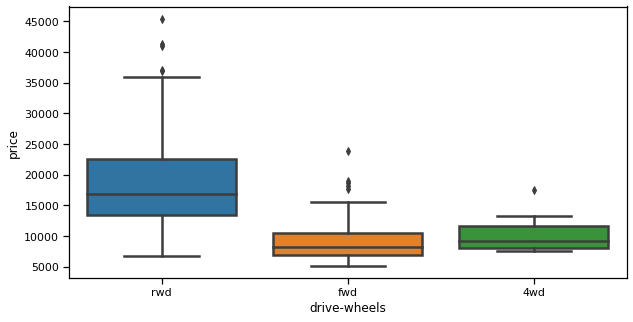

In [59]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

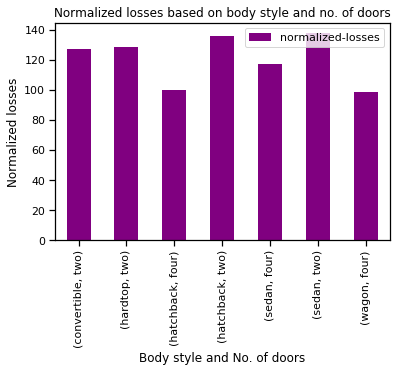

In [83]:
pd.pivot_table(df,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');